# Data Analysis on Naukri Jobs dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df = pd.read_csv('naukri_com-job_sample.csv')

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,21990,21991,21992,21993,21994,21995,21996,21997,21998,21999
company,MM Media Pvt Ltd,find live infotech,Softtech Career Infosystem Pvt. Ltd,Onboard HRServices LLP,Spire Technologies and Solutions Pvt. Ltd.,PFS Web Global Services Pvt Ltd,Kinesis Management Consultant Pvt. Ltd,Agile HR consultancy Pvt. Ltd. hiring for Ross...,HANSUM INDIA ELECTRONICS PVT.LTD.,Accenture,...,Link Tree Technologies PVT LTD hiring for CMM ...,MindGen Solutions,Confidential,Pin Click - Startup,Contactx Resource Management,Morgan Stanley Advantage Services Pvt. Ltd.,Careernet Technologies Pvt Ltd hiring for Client,Musk - Startup,Confidential,Cambio Consulting India Pvt Ltd
education,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,UG: Any Graduate - Any Specialization PG:Any P...,UG: Any Graduate - Any Specialization PG:CA Do...,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,NaN,"UG: Diploma - Any Specialization, Electrical, ...","UG: Diploma - Any Specialization, Electronics/...",UG: Any Graduate - Any Specialization PG:Any P...,...,UG: Any Graduate - Any Specialization PG:Post ...,UG: B.Tech/B.E. - Any Specialization,UG: Any Graduate - Any Specialization Doctorat...,UG: B.Tech/B.E. - Any Specialization Doctorate...,UG: Any Graduate - Any Specialization PG:Any P...,UG: Any Graduate - Any Specialization,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...
experience,0 - 1 yrs,0 - 0 yrs,4 - 8 yrs,11 - 15 yrs,6 - 8 yrs,2 - 5 yrs,1 - 3 yrs,2 - 7 yrs,1 - 3 yrs,1 - 5 yrs,...,7 - 12 yrs,13 - 17 yrs,12 - 18 yrs,3 - 4 yrs,10 - 14 yrs,9 - 13 yrs,3 - 5 yrs,2 - 4 yrs,7 - 12 yrs,5 - 10 yrs
industry,Media / Entertainment / Internet,Advertising / PR / MR / Event Management,IT-Software / Software Services,Banking / Financial Services / Broking,IT-Software / Software Services,IT-Software / Software Services,IT-Software / Software Services,Aviation / Aerospace Firms,Industrial Products / Heavy Machinery,IT-Software / Software Services,...,IT-Software / Software Services,Recruitment / Staffing,IT-Software / Software Services,Internet / Ecommerce,Industrial Products / Heavy Machinery,Banking / Financial Services / Broking,IT-Software / Software Services,Internet / Ecommerce,IT-Software / Software Services,IT-Software / Software Services
jobdescription,Job Description Send me Jobs like this Quali...,Job Description Send me Jobs like this Quali...,Job Description Send me Jobs like this - as ...,Job Description Send me Jobs like this - Inv...,Job Description Send me Jobs like this Pleas...,Job Description Send me Jobs like this We ar...,Job Description Send me Jobs like this exper...,Job Description Send me Jobs like this Job D...,Job Description Send me Jobs like this Indep...,Job Description Send me Jobs like this Overa...,...,Job Description Send me Jobs like this Looki...,Job Description Send me Jobs like this Respo...,Job Description Send me Jobs like this Solut...,Job Description Send me Jobs like this * I a...,Job Description Send me Jobs like this To br...,Job Description Send me Jobs like this Greet...,Job Description Send me Jobs like this Looki...,Job Description Send me Jobs like this Work ...,Job Description Send me Jobs like this We ar...,Job Description Send me Jobs like this Job d...
jobid,210516002263,210516002391,101016900534,81016900536,120916002122,131016005070,131016004451,121016002995,131016002120,121016901354,...,261116001071,261116001415,261116900077,251116900622,251116900780,241116007152,241116001104,251116900644,231116901329,251116003840
joblocation_address,Chennai,Chennai,Bengaluru,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Bengaluru,Bengaluru,"Delhi NCR, Mumbai, Bengaluru, Kochi, Greater N...",Bengaluru,Bengaluru,Bengaluru,...,Bengaluru,Bengaluru,Bengaluru,Bengalur

In [4]:
df.dtypes

company                object
education              object
experience             object
industry               object
jobdescription         object
jobid                  object
joblocation_address    object
jobtitle               object
numberofpositions      object
payrate                object
postdate               object
site_name              object
skills                 object
uniq_id                object
Unnamed: 14            object
Unnamed: 15            object
dtype: object

In [5]:
df.isnull().sum()

company                    4
education               1997
experience                 4
industry                   5
jobdescription             4
jobid                      0
joblocation_address      500
jobtitle                   1
numberofpositions      17530
payrate                  101
postdate                  25
site_name              18005
skills                   533
uniq_id                    3
Unnamed: 14            21991
Unnamed: 15            21998
dtype: int64

In [6]:
count_missing = df.isnull().sum()
percent_missing =  count_missing* 100 / df.shape[0]
missing_value_df = pd.DataFrame({'count_missing': count_missing,
                                 'percent_missing': percent_missing})

missing_value_df

,count_missing,percent_missing
company,4,0.018182
education,1997,9.077273
experience,4,0.018182
industry,5,0.022727
jobdescription,4,0.018182
jobid,0,0.000000
joblocation_address,500,2.272727
jobtitle,1,0.004545
numberofpositions,17530,79.681818
payrate,101,0.459091


In [7]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

## Data Cleaning

In [8]:
# Dropping unnecessary columns
df.drop('jobdescription', inplace=True, axis=1)
df.drop('jobid', inplace=True, axis=1)
df.drop('numberofpositions', inplace=True, axis=1)
df.drop('postdate', inplace=True, axis=1)
df.drop('site_name', inplace=True, axis=1)
df.drop('uniq_id', inplace=True, axis=1)
df.drop('Unnamed: 14', inplace=True, axis=1)
df.drop('Unnamed: 15', inplace=True, axis=1)

In [9]:
df.head()

,company,education,experience,industry,joblocation_address,jobtitle,payrate,skills
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Chennai,Walkin Data Entry Operator (night Shift),"1,50,000 - 2,25,000 P.A",ITES
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Chennai,Work Based Onhome Based Part Time.,"1,50,000 - 2,50,000 P.A. 20000",Marketing
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Bengaluru,Pl/sql Developer - SQL,Not Disclosed by Recruiter,IT Software - Application Programming
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,Not Disclosed by Recruiter,Accounts
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Bengaluru,JAVA Technical Lead (6-8 yrs) -,Not Disclosed by Recruiter,IT Software - Application Programming


In [10]:
len(df)

22000

In [11]:
df.payrate

0               1,50,000 - 2,25,000 P.A
1        1,50,000 - 2,50,000 P.A. 20000
2            Not Disclosed by Recruiter
3            Not Disclosed by Recruiter
4            Not Disclosed by Recruiter
                      ...              
21995        Not Disclosed by Recruiter
21996          8,50,000 - 14,00,000 P.A
21997        Not Disclosed by Recruiter
21998        Not Disclosed by Recruiter
21999         12,00,000 - 22,00,000 P.A
Name: payrate, Length: 22000, dtype: object

In [12]:
# Dropping rows with nan values in payrate
df.payrate.dropna(inplace=True)

In [13]:
df['payrate'] = df['payrate'].apply(str)
df['payrate'] = df['payrate'].apply(lambda x: x.split('P')[0])

In [14]:
# Removing rows that have only alphabetic characters.
df = df[~df['payrate'].str.contains("[a-zA-Z]").fillna(False)]

In [15]:
len(df)

5201

In [16]:
df['temporary'] = df['payrate'].apply(lambda x: x if '-' not in x else '-1')

In [17]:
df.temporary.value_counts()

-1           4618
              552
2,00,000        6
3,00,000        5
2,50,000        5
50,000          4
1,25,000        1
60,000          1
14000           1
4,50,000        1
1,00,000        1
5               1
4,25,000        1
4               1
1               1
2,25,000        1
1,50,000        1
Name: temporary, dtype: int64

In [18]:
df = df[df['temporary'] == '-1']

In [19]:
len(df)

4618

In [20]:
df.drop('temporary', inplace=True, axis=1)

In [21]:
# Split and save min salary from payrate column
df['min_salary'] = df['payrate'].apply(lambda x: x.split('-')[0])

# Split and save max salary from payrate column
df['max_salary'] = df['payrate'].apply(lambda x: x.split('-')[1])

In [22]:
# Removing commas from the string
df['min_salary'] = df['min_salary'].str.replace(',','')
df['max_salary'] = df['max_salary'].str.replace(',','')

In [23]:
# Changing dtype from str to int
df['min_salary'] = df['min_salary'].apply(int)
df['max_salary'] = df['max_salary'].apply(int)

In [24]:
# Finding Average salary
df['average_salary'] = (df['min_salary'] + df['max_salary']) / 2

In [25]:
# Replacing some names in locations

df['joblocation_address'] = df['joblocation_address'].replace(['(Bengaluru/Bangalore)',
                                                              'Bengaluru',
                                                              'Bangalore , Bangalore / Bangalore',
                                                              'Bangalore , karnataka',
                                                              'Bangalore, Chennai, Mumbai, Pune, Hyderabad, NCR',
                                                              'Bangalore , Mumbai , Chennai , Pune , Hyderabad , NCR/NCR(National Capital Region) , Ahmedabad , Kolkata , Surat',
                                                              'Bangalore , Chennai , Hyderabad',
                                                              'Bangalore , Hyderabad',
                                                              'Bangalore, Hyderabad',
                                                              'Bangalore , NCR',
                                                              'Bangalore, Mumbai, Chennai, Hyderabad, Bhopal, NCR NCR, NCR, Kolkata'], 'Bangalore')

df['joblocation_address'] = df['joblocation_address'].replace(['Noida',
                                                               'Delhi',
                                                               'Gurgaon', 
                                                               'Delhi/NCR(National Capital Region)',
                                                               'Delhi , Delhi',
                                                               'Noida , Noida/Greater Noida',
                                                               'Ghaziabad',
                                                               'Delhi/NCR(National Capital Region) , Gurgaon',
                                                               'NCR , NCR',
                                                               'NCR/NCR(National Capital Region)',
                                                               'NCR , NCR/Greater NCR',
                                                               'NCR/NCR(National Capital Region) , NCR', 
                                                               'NCR , NCR/NCR(National Capital Region)',
                                                               'NCR/NCR(National Capital Region)',
                                                              'NCR/Greater NCR',
                                                              'NCR NCR, Mumbai, Bangalore, Chennai, Pune, NCR, NCR'], 'NCR')

df['joblocation_address'] = df['joblocation_address'].replace(['Hyderabad / Secunderabad'], 'Hyderabad')

joblocation_address = df['joblocation_address'].value_counts()

In [26]:
# Replacing some names in companies

df['company'] = df['company'].replace(['Metro Career Solutions Pvt Ltd hiring for Many Top Industry Clients & MNC Clients'], 'Metro Career Solutions Pvt Ltd')
df['company'] = df['company'].replace(['Black and White Business Solutions Pvt Ltd hiring for Client of Black and white Busiess solutions'], 'Black and White Business Solutions Pvt Ltd')
df['company'] = df['company'].replace(['White Horse Manpower Consultancy Private Limited hiring for MNC Bpo/kpo','White Horse Manpower Consultancy Private Limited hiring for MNC BPO'], 'White Horse Manpower Consultancy Private Limited')

In [27]:
# Replacing some names in job titles

df['jobtitle'] = df['jobtitle'].replace(['Medical Coding Transcription- TO BE Honest YOU CAN DO Transcription',
                                         'Medical Coding- Join Today For A Better Tomorrow- Whatsapp@ 9789004777',
                                        'Medical Coding - Job Bookings Open - Whatsapp@ 09789004777 - Yogam BPO',
                                        'Medical Coding - Are You Ready? - Whatsapp@ 09789004777 - Yogam BPO',
                                        'Medical Coding Transcription - We Will Help You Out - Wtsap 9789004777',
                                        'Medical Coding Transcription- TO BE Honest YOU CAN Learn Transcription'], 'Medical Coding Transcription')

In [28]:
# Split and save the min exp from the experience column
df['min_experience'] = df['experience'].apply(lambda x: x.split('-')[0])

# Split and save the max exp from the experience column
df['max_experience'] = df['experience'].apply(lambda x: x.split('-')[1])
df['max_experience'] = df['experience'].apply(lambda x: x.split(' ')[0])

In [29]:
# Changing dtype from str to int
df['min_experience'] = df['min_experience'].apply(int)
df['max_experience'] = df['max_experience'].apply(int)

In [30]:
df.dtypes

company                 object
education               object
experience              object
industry                object
joblocation_address     object
jobtitle                object
payrate                 object
skills                  object
min_salary               int64
max_salary               int64
average_salary         float64
min_experience           int64
max_experience           int64
dtype: object

In [31]:
# Finding individuals with an engineering degree
df['education'] = df['education'].apply(str);
df['Engineering'] = df['education'].apply(lambda x: 'Yes' if 'B.Tech/B.E.' in x else 'No')

In [32]:
# Finding the MBA graduates
df['MBA'] = df['education'].apply(lambda x: 'Yes' if 'MBA' in x else 'No')

In [33]:
# Finding individuals with a post graduate degree
df['PG'] = df['education'].apply(lambda x: 'Yes' if 'PG' in x else 'No')

In [34]:
# Finding individuals in the IT industry
df['IT_industry'] = df['industry'].apply(lambda x: 'Yes' if 'IT' in x else 'No')

In [35]:
# Finding individuals with IT skills
df.skills = df.skills.apply(str)
df['IT_skills'] = df['skills'].apply(lambda x: 'Yes' if 'IT' in x else 'No')

## Visualizations

In [36]:
sns.set_theme()

#### 1. Countplot Describing Top 15 Companies With Maximum Job Listings

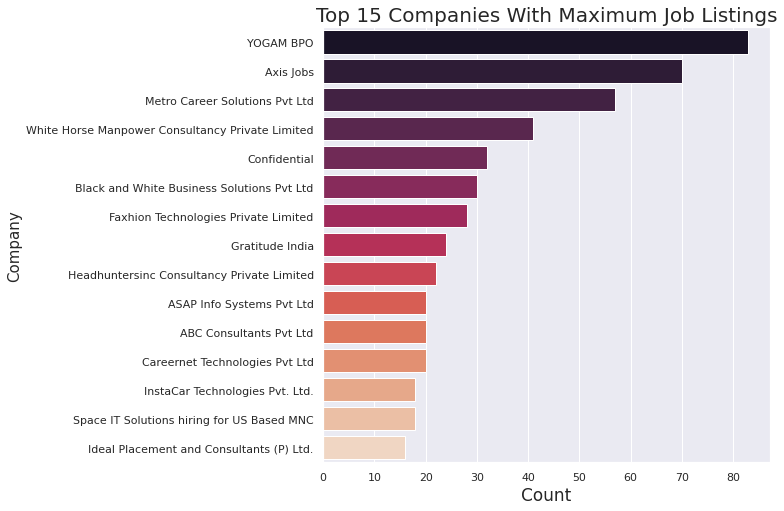

In [37]:
plt.figure(figsize=(8,8))
company = sns.countplot(y = 'company', 
                        data = df, 
                        order = df['company'].value_counts().head(15).index,
                       palette = 'rocket'
                       )
plt.title("Top 15 Companies With Maximum Job Listings", fontsize=20)
plt.ylabel("Company", fontsize=15)
plt.xlabel("Count", fontsize=17)
plt.show()

####   

#### 2. Countplot Describing Top 15 Industries/Fields Offering Highest Jobs

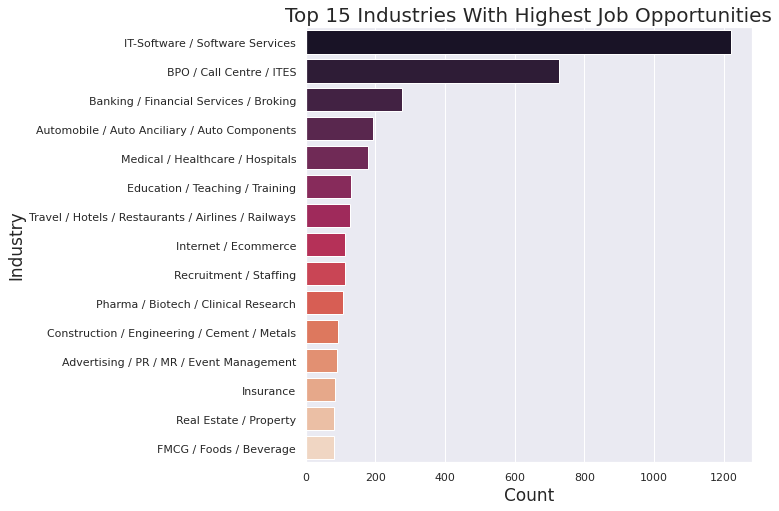

In [38]:
plt.figure(figsize=(8,8))
company = sns.countplot(y = 'industry', 
                        data = df, 
                        order = df['industry'].value_counts().head(15).index,
                        palette = 'rocket'
                       )
plt.title("Top 15 Industries With Highest Job Opportunities", fontsize=20)
plt.ylabel("Industry", fontsize=17)
plt.xlabel("Count",fontsize=17)
plt.show()

####   

#### 3. Countplot Describing Top 15 Industries/Fields With Least Number Of Jobs

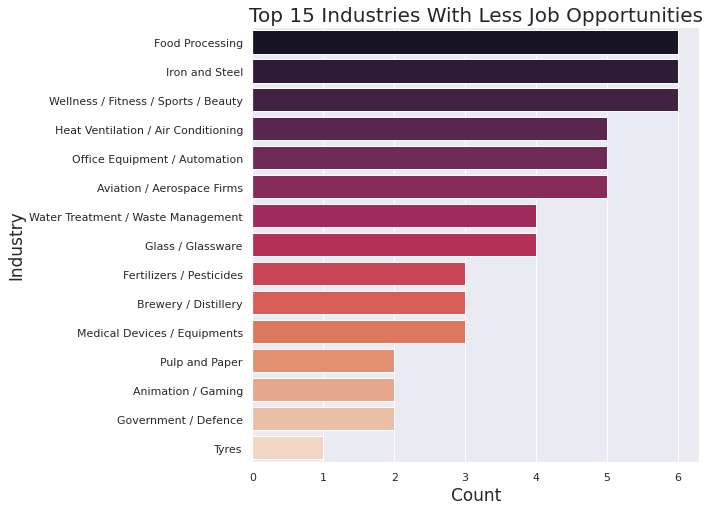

In [39]:
plt.figure(figsize=(8,8))
company = sns.countplot(y = 'industry', 
                        data = df, 
                        order = df['industry'].value_counts().tail(15).index,
                        palette = 'rocket'
                       )
plt.title("Top 15 Industries With Less Job Opportunities", fontsize=20)
plt.ylabel("Industry", fontsize=17)
plt.xlabel("Count",fontsize=17)
plt.show()

####   

#### 4. Countplot Describing Top 15 Job Titles 

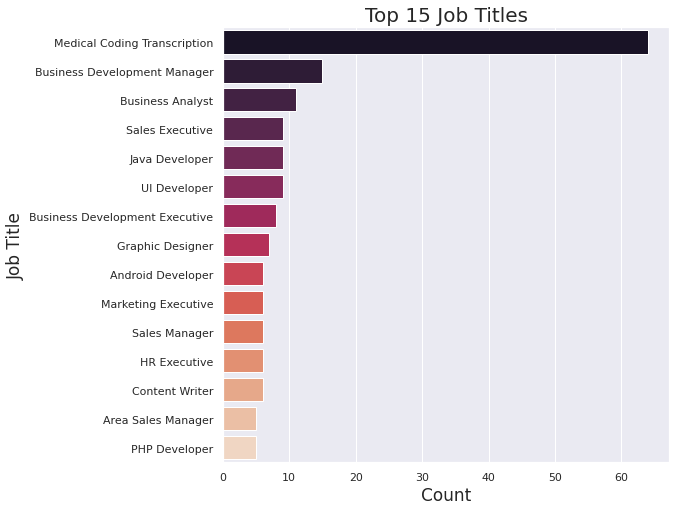

In [40]:
plt.figure(figsize=(8,8))
company = sns.countplot(y = 'jobtitle', 
                        data = df, 
                        order = df['jobtitle'].value_counts().head(15).index,
                        palette = 'rocket'
                       )
plt.title("Top 15 Job Titles", fontsize=20)
plt.ylabel("Job Title", fontsize=17)
plt.xlabel("Count",fontsize=17)
plt.show()

####   

#### 5. Count Plot Describing Top 15 In-Demand Skills Offering Highest Number Of Jobs

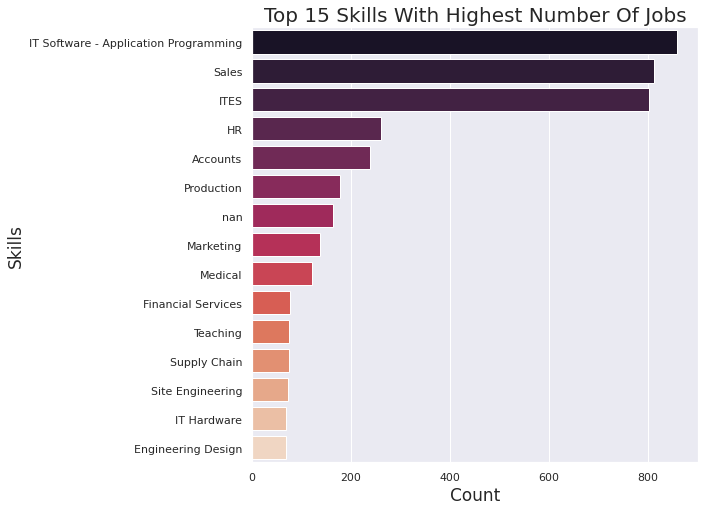

In [41]:
plt.figure(figsize=(8,8))
company = sns.countplot(y = 'skills', 
                        data = df, 
                        order = df['skills'].value_counts().head(15).index,
                        palette = 'rocket'
                       )
plt.title("Top 15 Skills With Highest Number Of Jobs", fontsize=20)
plt.ylabel("Skills", fontsize=17)
plt.xlabel("Count",fontsize=17)
plt.show()

####   

#### 6. Countplot Describing 15 Skills With Less Job Opportunities

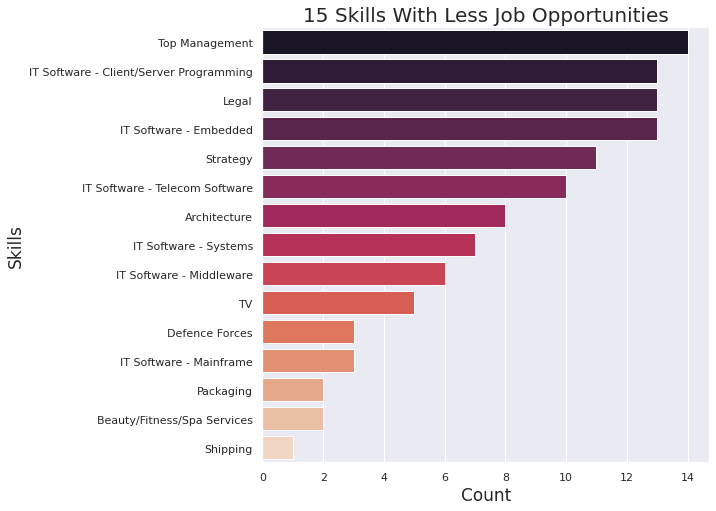

In [42]:
plt.figure(figsize=(8,8))
company = sns.countplot(y = 'skills', 
                        data = df, 
                        order = df['skills'].value_counts().tail(15).index,
                        palette = 'rocket'
                       )
plt.title("15 Skills With Less Job Opportunities", fontsize=20)
plt.ylabel("Skills", fontsize=17)
plt.xlabel("Count",fontsize=17)
plt.show()

####   

#### 7. Countplot Describing Top 15 Job Locations With Maximum Job Opportunities

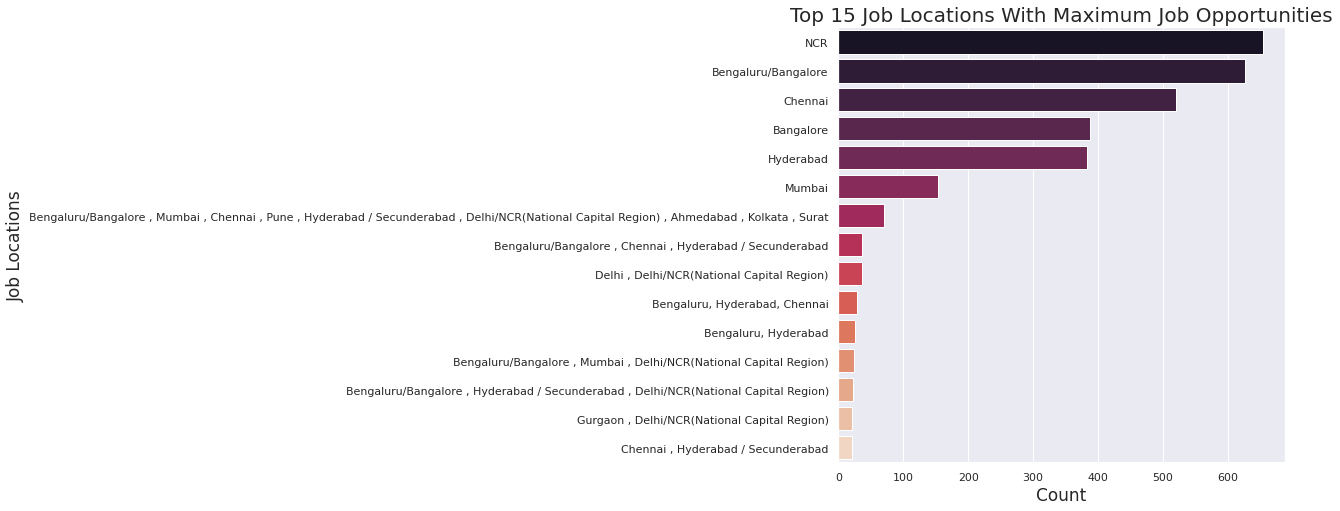

In [43]:
plt.figure(figsize=(8,8))
company = sns.countplot(y = 'joblocation_address', 
                        data = df, 
                        order = df['joblocation_address'].value_counts().head(15).index,
                        palette = 'rocket'
                       )
plt.title("Top 15 Job Locations With Maximum Job Opportunities", fontsize=20)
plt.ylabel("Job Locations", fontsize=17)
plt.xlabel("Count",fontsize=17)
plt.show()

####   

#### 8. Strip-plot Describing Relationship between Minimum Experience And Average Salary

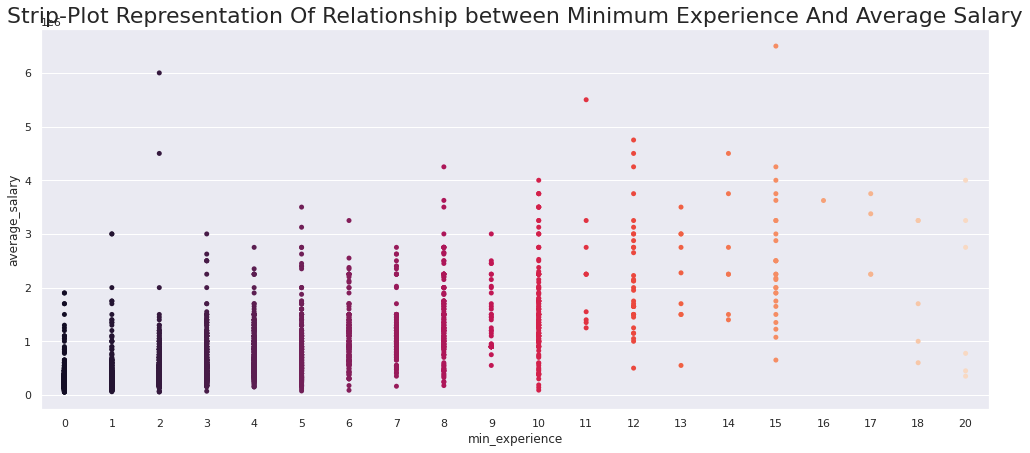

In [44]:
f,ax=plt.subplots(figsize=(17,7))
sns.stripplot(x='min_experience', y='average_salary', data=df, jitter=False, palette='rocket')
plt.title('Strip-Plot Representation Of Relationship between Minimum Experience And Average Salary', fontsize=22)
plt.show()

####   

#### 9. Point-Plot Describing Relationship between Minimum Experience And Average Salary

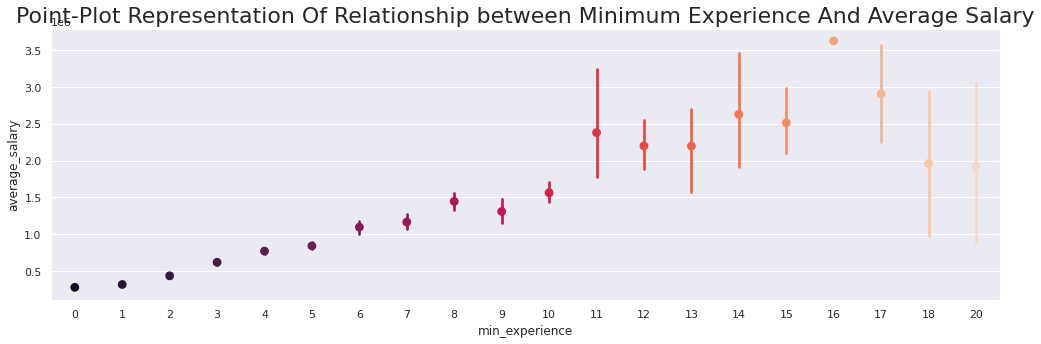

In [45]:
f,ax=plt.subplots(figsize=(17,5))
sns.pointplot(x='min_experience', y='average_salary', data=df, jitter=False, palette='rocket')
plt.title('Point-Plot Representation Of Relationship between Minimum Experience And Average Salary', fontsize=22)
plt.show()

####   

#### 10. Seaborn Catplots using Boxen Describing Relationship between Maximum Experience And Average Salary

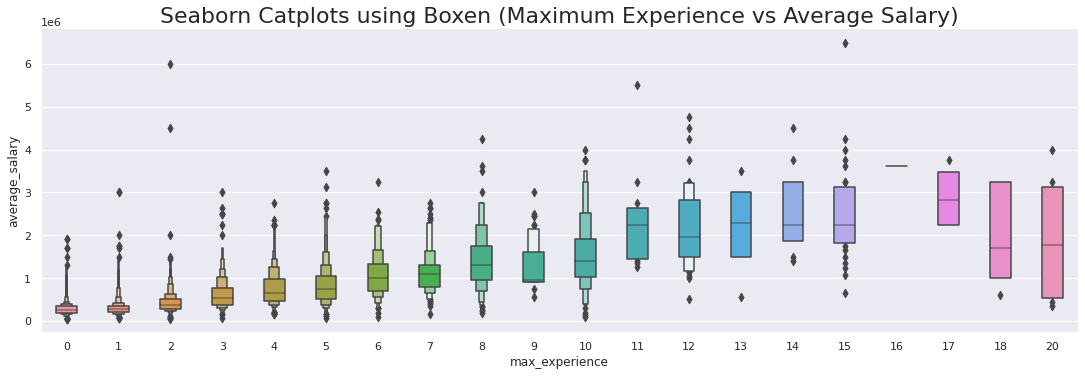

In [46]:
sns.catplot(x='max_experience', y='average_salary', data=df , kind="boxen" , width=0.4 ,aspect=3)
plt.title('Seaborn Catplots using Boxen (Maximum Experience vs Average Salary)', fontsize=22)
plt.show()

####   

#### 11. Pair-plot Showing Relationship Of Minimum Salary With Minimum And Maximum Experience

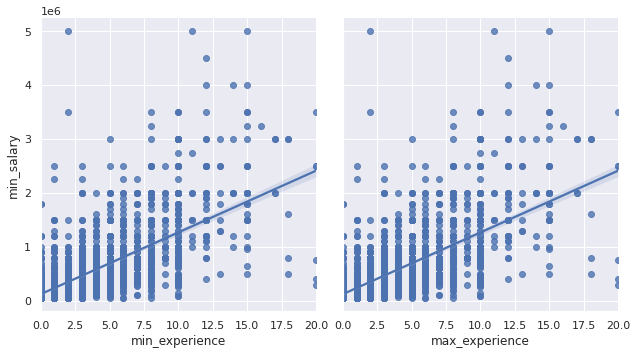

In [47]:
sns.pairplot(df, 
             size=5, aspect=0.9, 
             x_vars=["min_experience","max_experience"],
             y_vars=["min_salary"],
             kind="reg");

####   

#### 12. Catplot Showing Comparison Of Average Salary Between Engineers And Non-Engineers

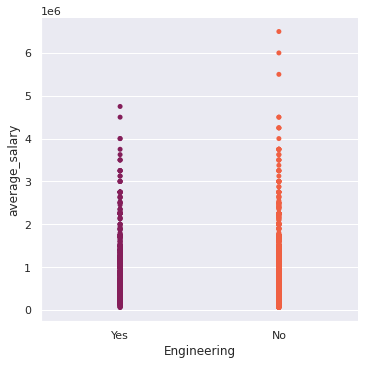

In [48]:
sns.catplot(x="Engineering", y="average_salary", jitter=False, data=df, palette="rocket");

####   

#### 13. Pointplot Showing Comparison Of Average Salary Between Engineers And Non-Engineers

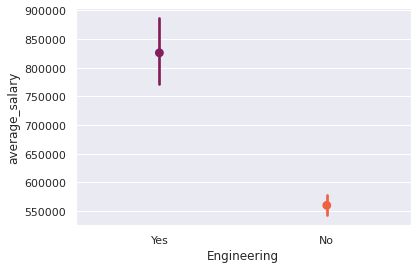

In [49]:
sns.pointplot(x="Engineering", y="average_salary", jitter=False, data=df, palette="rocket");

####   

#### 14. Catplot Showing Comparison Of Average Salary Between MBA And Non-MBA Graduates

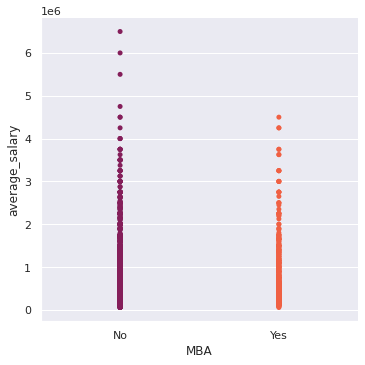

In [50]:
sns.catplot(x="MBA", y="average_salary", jitter=False, data=df, palette="rocket");

####   

#### 15. Pointplot Showing Comparison Of Average Salary Between MBA And Non-MBA Graduates

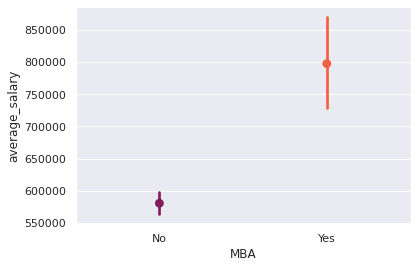

In [51]:
sns.pointplot(x="MBA", y="average_salary", jitter=False, data=df, palette="rocket");

####   

#### 16. Catplot Showing Comparison Of Average Salary Between Post Graduates And Non-Post Graduates

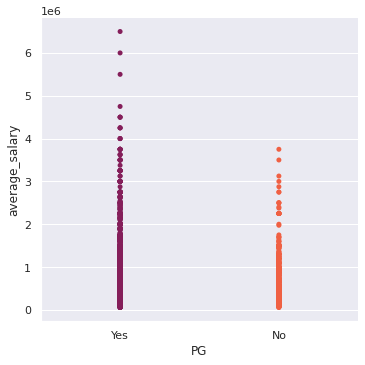

In [52]:
sns.catplot(x="PG", y="average_salary", jitter=False, data=df, palette="rocket");

####   

#### 17. Pointplot Showing Comparison Of Average Salary Between Post Graduates And Non-Post Graduates

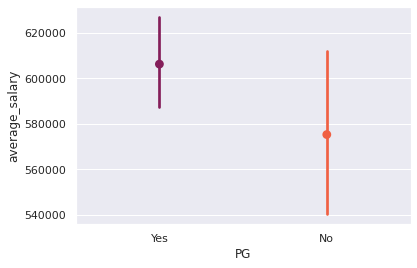

In [53]:
sns.pointplot(x="PG", y="average_salary", jitter=False, data=df, palette="rocket");

####   

#### 18. Catplot Showing Comparison Of Average Salary Of People Working In IT And Non-IT Industries

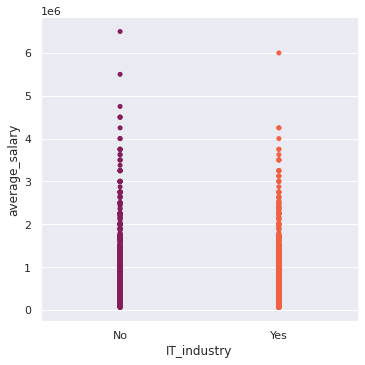

In [54]:
sns.catplot(x="IT_industry", y="average_salary", jitter=False, data=df, palette="rocket");

####   

#### 19. Pointplot Showing Comparison Of Average Salary Of People Working In IT And Non-IT Industries

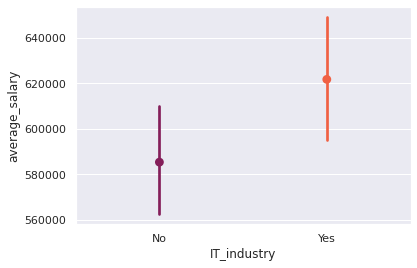

In [55]:
sns.pointplot(x="IT_industry", y="average_salary", jitter=False, data=df, palette="rocket");

####   

#### 20. Catplot Showing Comparison Of Average Salary Of People With And Without IT Skills

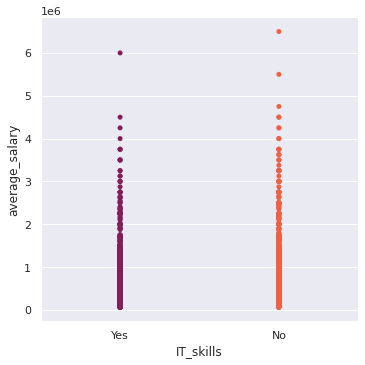

In [56]:
sns.catplot(x="IT_skills", y="average_salary", jitter=False, data=df, palette="rocket");

####   

#### 21. Pointplot Showing Comparison Of Average Salary Of People With And Without IT Skills

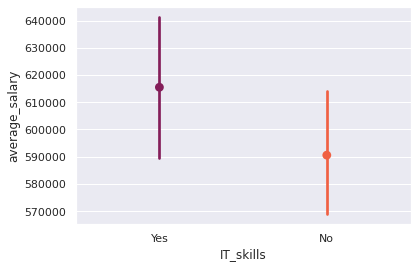

In [57]:
sns.pointplot(x="IT_skills", y="average_salary", jitter=False, data=df, palette="rocket");

####   

#### 22. Bar Graph Showing The Top 10 Industries With Maximium Average Salary

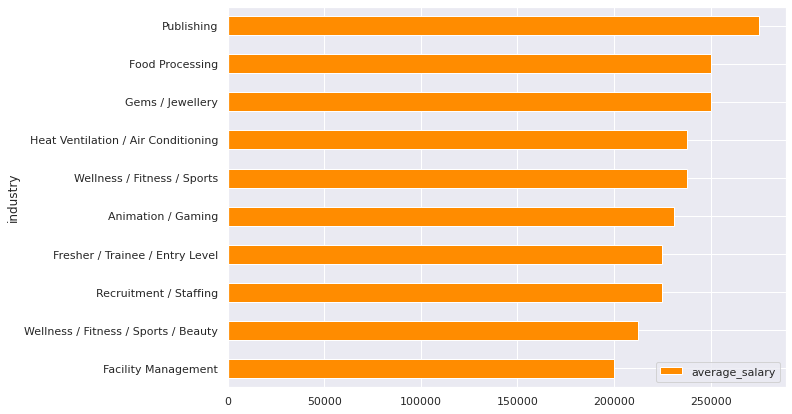

In [58]:
df[['average_salary','industry']].groupby(["industry"]).median().sort_values(by='average_salary').head(10).plot.barh(color='DarkOrange', figsize=(10,7));

####   

#### 23. Bar Graph Showing The Top 10 Job Titles With Maximium Average Salary

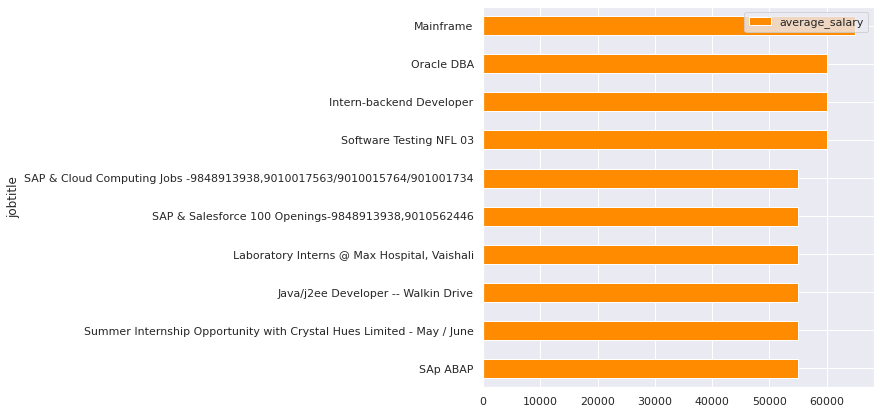

In [59]:
df[['average_salary','jobtitle']].groupby(["jobtitle"]).median().sort_values(by='average_salary').head(10).plot.barh(color='DarkOrange', figsize=(7,7));